### Import libraries

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

### Upload Data Base

In [2]:
df = pd.read_csv(r'base_mt_hispanos.csv')

In [3]:
df.columns

Index(['CUS_CUST_ID', 'SIT_SITE_ID', 'restriccion', 'flag_trusted_seller',
       'gmv_approved', 'gmv_claim', 'cashout', 'ratio_gmv_claim', 'ratio_co',
       'flag_low_claims', 'flag_low_co', 'flag_ok_pu', 'SIT_GMV_90D',
       'CUST_ID_GMV_90D', 'TAMAÑO'],
      dtype='object')

In [4]:
df.shape

(3646, 15)

In [5]:
df.head()

,CUS_CUST_ID,SIT_SITE_ID,restriccion,flag_trusted_seller,gmv_approved,gmv_claim,cashout,ratio_gmv_claim,ratio_co,flag_low_claims,flag_low_co,flag_ok_pu,SIT_GMV_90D,CUST_ID_GMV_90D,TAMAÑO
0,494294258,MLC,NaN,1,3138668,217585.0,17178,0.07,0.08,1,1,1,521710726,3138668.0,0.00602
1,215299808,MLA,NaN,1,7687577,571395.0,17987,0.07,0.03,1,1,1,1491140390,7789648.0,0.00522
2,197973038,MLC,NaN,1,2491455,103505.0,8702,0.04,0.08,1,1,1,521710726,2522104.0,0.00483
3,270193032,MLC,NaN,1,2458059,117023.0,9857,0.05,0.08,1,1,1,521710726,2488849.0,0.00477
4,582046359,MLC,NaN,1,1950259,155317.0,8605,0.08,0.06,1,1,1,521710726,1968049.0,0.00377


### Users distribution

In [6]:
gb = df.groupby(['SIT_SITE_ID','flag_ok_pu']).size()
gb = gb.reset_index()
gb = pd.pivot_table(gb,columns='flag_ok_pu',index='SIT_SITE_ID',values=0)
gb.fillna(0, inplace=True)
gb

flag_ok_pu,0,1
SIT_SITE_ID,,
MCO,489,844
MLA,11,88
MLC,534,686
MLM,329,665


<AxesSubplot:title={'center':'Users per Site'}, xlabel='SIT_SITE_ID'>

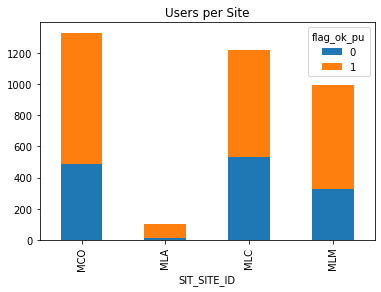

In [7]:
gb.plot(kind='bar',
        title = 'Users per Site',
        stacked= True)

### Keep the users that have flag_ok_pu = 1

In [8]:
df_pu=df[df['flag_ok_pu']==1]

### Add column row_number to de DF_PU

In [9]:
df_pu['row_number'] = np.arange(len(df_pu))+1

<ipython-input-9-f549d047c801>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pu['row_number'] = np.arange(len(df_pu))+1


In [10]:
df_pu.columns

Index(['CUS_CUST_ID', 'SIT_SITE_ID', 'restriccion', 'flag_trusted_seller',
       'gmv_approved', 'gmv_claim', 'cashout', 'ratio_gmv_claim', 'ratio_co',
       'flag_low_claims', 'flag_low_co', 'flag_ok_pu', 'SIT_GMV_90D',
       'CUST_ID_GMV_90D', 'TAMAÑO', 'row_number'],
      dtype='object')

In [11]:
df_pu.shape

(2283, 16)

In [12]:
df_pu.head()

,CUS_CUST_ID,SIT_SITE_ID,restriccion,flag_trusted_seller,gmv_approved,gmv_claim,cashout,ratio_gmv_claim,ratio_co,flag_low_claims,flag_low_co,flag_ok_pu,SIT_GMV_90D,CUST_ID_GMV_90D,TAMAÑO,row_number
0,494294258,MLC,NaN,1,3138668,217585.0,17178,0.07,0.08,1,1,1,521710726,3138668.0,0.00602,1
1,215299808,MLA,NaN,1,7687577,571395.0,17987,0.07,0.03,1,1,1,1491140390,7789648.0,0.00522,2
2,197973038,MLC,NaN,1,2491455,103505.0,8702,0.04,0.08,1,1,1,521710726,2522104.0,0.00483,3
3,270193032,MLC,NaN,1,2458059,117023.0,9857,0.05,0.08,1,1,1,521710726,2488849.0,0.00477,4
4,582046359,MLC,NaN,1,1950259,155317.0,8605,0.08,0.06,1,1,1,521710726,1968049.0,0.00377,5


### Graph the distribution of the size

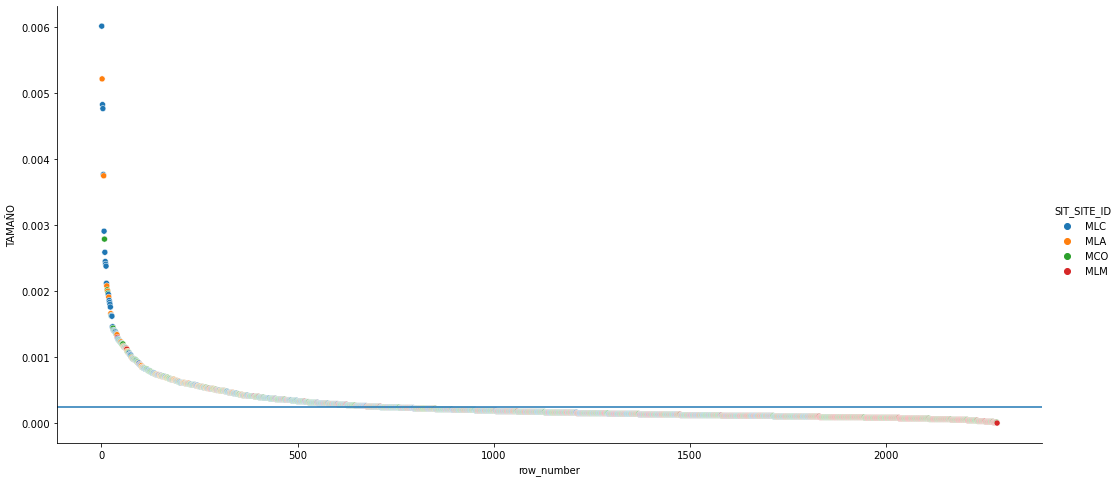

In [38]:
sns.relplot(data=df_pu, x="row_number", y="TAMAÑO", hue="SIT_SITE_ID",kind="scatter", height=6.6, aspect=2.2)
#plt.yticks(np.arange(0.0,0.00602,step=0.0002))
plt.axhline(y=0.00025, xmin=0, xmax=2400)

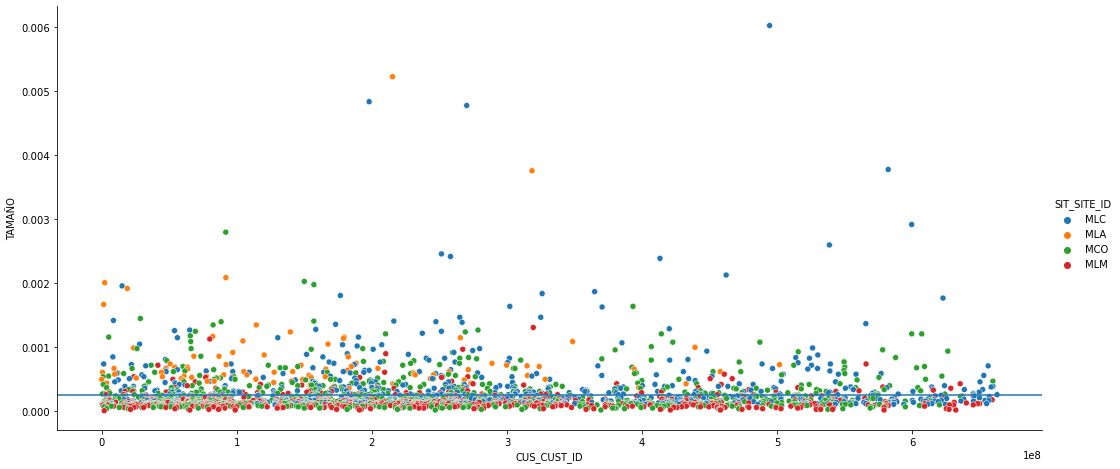

In [37]:
sns.relplot(data=df_pu, x="CUS_CUST_ID", y="TAMAÑO", hue="SIT_SITE_ID",kind="scatter", height=6.6, aspect=2.2)
plt.axhline(y=0.00025, xmin=0, xmax=2400)

### Tag the users with size >= 0.00025

In [39]:
cond = df_pu['TAMAÑO'] >= 0.00025
df_pu['BIG']= 0
df_pu.loc[cond,'BIG'] = 1

<ipython-input-39-b93d2136a246>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pu['BIG']= 0
/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [41]:
df_pu.sample(10)

,CUS_CUST_ID,SIT_SITE_ID,restriccion,flag_trusted_seller,gmv_approved,gmv_claim,cashout,ratio_gmv_claim,ratio_co,flag_low_claims,flag_low_co,flag_ok_pu,SIT_GMV_90D,CUST_ID_GMV_90D,TAMAÑO,row_number,BIG
842,156732998,MCO,NaN,1,24162,1962.0,111,0.08,0.06,1,1,1,111709499,24183.0,0.00022,843,0
2173,278750803,MLM,NaN,1,60651,8326.0,345,0.14,0.04,1,1,1,1131185965,61174.0,0.00005,2174,0
1853,120951099,MLM,NaN,1,104431,3450.0,155,0.03,0.04,1,1,1,1131185965,105746.0,0.00009,1854,0
1095,161208963,MLM,NaN,1,188228,18569.0,694,0.10,0.04,1,1,1,1131185965,191540.0,0.00017,1096,0
1067,93737883,MCO,NaN,1,19395,694.0,7,0.04,0.01,1,1,1,111709499,19481.0,0.00017,1068,0
272,31342573,MLC,NaN,1,274472,14902.0,950,0.05,0.06,1,1,1,521710726,277217.0,0.00053,273,1
405,400136757,MLC,NaN,1,200548,11977.0,417,0.06,0.03,1,1,1,521710726,203101.0,0.00039,406,1
529,161356682,MCO,NaN,1,34796,2797.0,128,0.08,0.05,1,1,1,111709499,35184.0,0.00031,530,1
1969,54322712,MLM,NaN,1,91453,6645.0,432,0.07,0.06,1,1,1,1131185965,92902.0,0.00008,1970,0
312,331577324,MLC,NaN,1,251097,19836.0,853,0.08,0.04,1,1,1,521710726,254100.0,0.00049,313,1


### Distribution of the users 'BIG' with flag_ok_pu = 1 per site

In [45]:
df_pu['BIG'].value_counts

<bound method IndexOpsMixin.value_counts of 0       1
1       1
2       1
3       1
4       1
       ..
2278    0
2279    0
2280    0
2281    0
2282    0
Name: BIG, Length: 2283, dtype: int64>

In [ ]:
gb = df_pu.groupby(['SIT_SITE_ID','flag_ok_pu']).size()
gb = gb.reset_index()
gb = df_pu.pivot_table(gb,columns='flag_ok_pu',index='SIT_SITE_ID',values=0)
gb.fillna(0, inplace=True)
gb

In [47]:
gb = df_pu.groupby(['SIT_SITE_ID','BIG']).size()
gb = gb.reset_index()
gb = df_pu.pivot_table(gb,columns='BIG',index='SIT_SITE_ID',values=0)
gb.fillna(0, inplace=True)
gb

TypeError: pivot_table() got multiple values for argument 'values'

In [ ]:
gb.plot(kind='bar',
        title = 'Users per Site',
        stacked= True)

In [ ]:
Hispanic-MT-to-PU
Short analysis of hispanic MT users to see if they can enter to the Protected Users